<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/Adaptation_Domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
pip install numpy scipy matplotlib POT # keras

In [2]:
!pip install scipy==1.13.1

In [3]:
!pip install --upgrade gensim

In [4]:
!pip install scipy --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [5]:
!pip install scipy==1.13.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 39.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [6]:
!pip install "scipy==1.13.1" --no-deps

In [21]:
from google.colab import files
files.upload()

Saving jdot.py to jdot.py


{'jdot.py': b'# -*- coding: utf-8 -*-\n"""\nCreated on Thu Sep 21 16:59:10 2017\n\n@author: rflamary\n"""\n\n# Author: Remi Flamary <remi.flamary@unice.fr>\n#         Nicolas Courty <ncourty@irisa.fr>\n#\n# License: MIT License\n\nimport numpy as np\nfrom scipy.spatial.distance import cdist \nimport classif\nimport sklearn\nimport ot\n\n#from sklearn import datasets\n\n\n# X: source domain\n# y: source labeks\n# Xtest: target domain\n# ytest is optionnal, just to measure performances of the method along iterations\n# gamma: RBF kernel param (default=1)\n# numIterBCD: number of Iterations for BCD (default=10)\n# alpha: ponderation between ground cost + function cost\n# method: choice of algorithm for transport computation (default: emd)\n\n\ndef jdot_krr(X,y,Xtest,gamma_g=1, numIterBCD = 10, alpha=1,lambd=1e1, \n             method=\'emd\',reg=1,ktype=\'linear\'):\n    # Initializations\n    n = X.shape[0]\n    ntest = Xtest.shape[0]\n    wa=np.ones((n,))/n\n    wb=np.ones((ntest,))/nte

In [23]:
import jdot

Angle=40.10704565915762


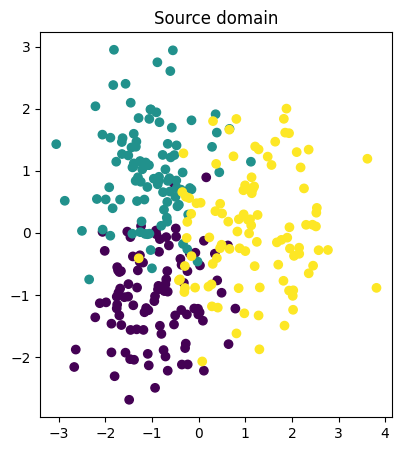

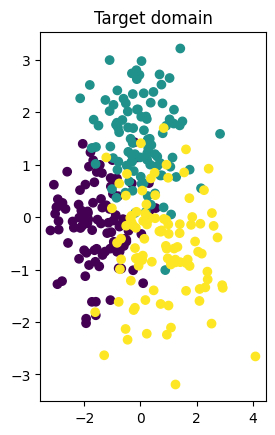

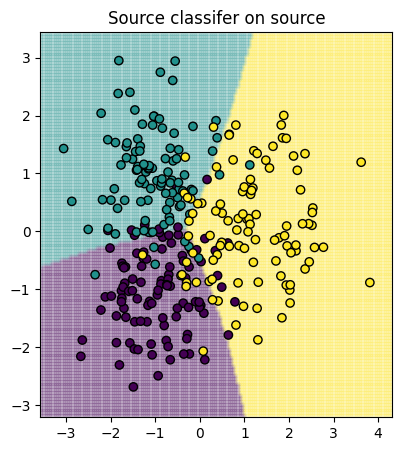

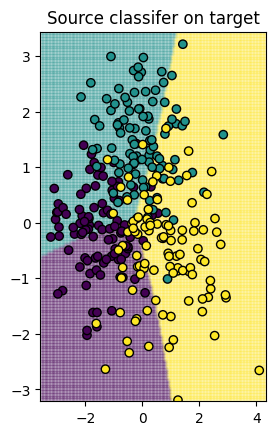

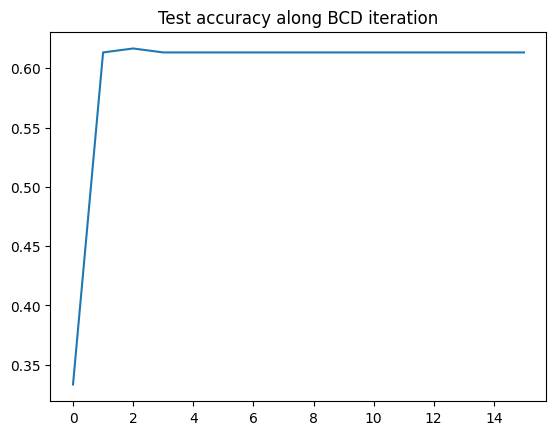

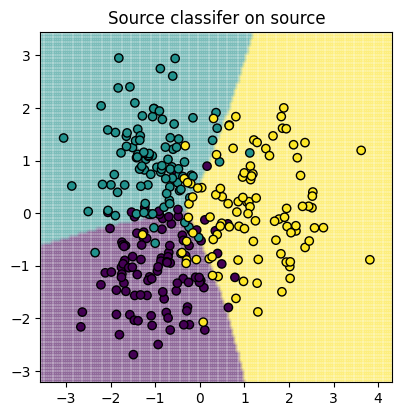

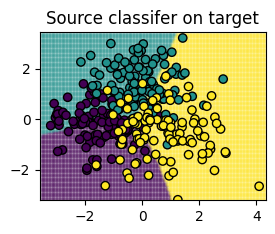

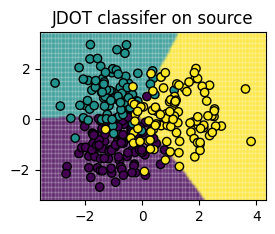

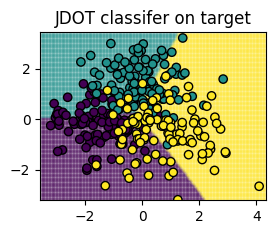

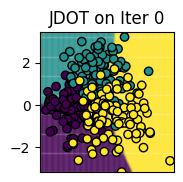

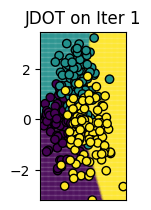

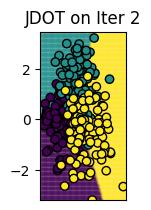

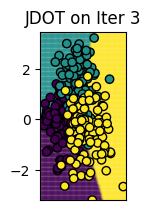

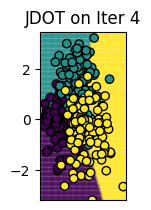

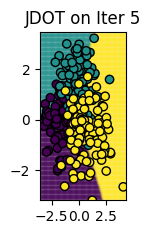

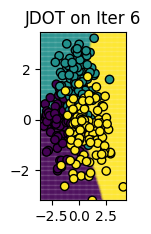

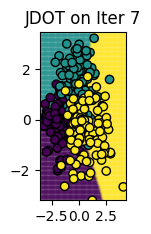

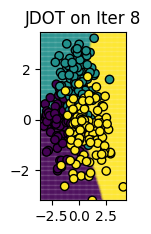

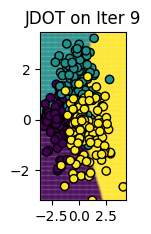

<Figure size 640x480 with 0 Axes>

In [25]:

# -*- coding: utf-8 -*-
"""
Classification example for JDOT
"""

# Author: Remi Flamary <remi.flamary@unice.fr>
#         Nicolas Courty <ncourty@irisa.fr>
#
# License: MIT License

import numpy as np
import pylab as pl
import ot
import jdot
#from sklearn import datasets
import classif
import os
os.makedirs('/content/imgs', exist_ok=True) #Ajout pour créer le dossier '/content/imgs'




#%% data generation

seed=1985
np.random.seed(seed)

n = 300
ntest=300
nz=.3

theta=0.7

dataset='3gauss'
X,y=ot.datasets.get_data_classif(dataset,n,nz)

Xtest,ytest=ot.datasets.get_data_classif(dataset,ntest,nz)





print('Angle='+str(theta*180./np.pi))
rotation = np.array([[np.cos(theta),np.sin(theta)],
                          [-np.sin(theta),np.cos(theta)]])
#y[1:100]=2
Xtest=np.dot(Xtest,rotation.T)
#Xtest=Xtest2

nbnoise=0
if nbnoise:
    X=np.hstack((X,np.random.randn(n,nbnoise)))
    Xtest=np.hstack((Xtest,np.random.randn(ntest,nbnoise)))

Y,Yb=classif.get_label_matrix(y)

# visu grid
h=.05
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
xfin=np.c_[xx.ravel(), yy.ravel()]

def plot_data_classif(X,y,Z=None):
    if not Z is None:
        pl.pcolormesh(xx, yy,np.argmax(Z,2),edgecolors='face',alpha=.1, vmin=0, vmax=2)
    pl.scatter(X[:,i1],X[:,i2],c=y,edgecolors='black')#,cmap='Pastel2')

def predict_test(clf,gamma,Xapp,Xtest):
    Kx=classif.rbf_kernel(Xtest,Xapp,gamma=gamma)
    return clf.predict(Kx)

def predict_test_grid(clf,gamma,Xapp):
    return predict_test(clf,gamma,Xapp,xfin).reshape((xx.shape[0],xx.shape[1],3))

#%% plot data
pl.figure(1,(10,5))


i1=0
i2=1;

pl.subplot(1,2,1)
pl.scatter(X[:,i1],X[:,i2],c=y)#,cmap='Pastel2')
pl.title('Source domain')
pl.show()

pl.subplot(1,2,2)
pl.scatter(Xtest[:,i1],Xtest[:,i2],c=ytest)#,cmap='Pastel2')
pl.title('Target domain')
pl.show()


#%% plot classifier on source

reg=1e-1
gamma=0.1#svm.estimGamma(Xtest)

clf=classif.SVMClassifier(reg)
K=classif.rbf_kernel(X,X,gamma=gamma)


clf.fit(K,Yb) # use binary matrix Y0

# visu
Z = predict_test_grid(clf,gamma,X)


pl.figure(2,(10,5))
pl.subplot(1,2,1)
plot_data_classif(X,y,Z)
pl.title('Source classifer on source')
pl.show()

pl.subplot(1,2,2)
plot_data_classif(Xtest,ytest,Z)
pl.title('Source classifer on target')
pl.show()

#%% plot Jdot

reg=1e1
itermax=15
gamma=0.1#svm.estimGamma(Xtest)

clf_jdot,dic= jdot.jdot_svm(X,Y,Xtest,ytest,gamma_g=gamma,numIterBCD = itermax, alpha=.1, lambd=reg,ktype='rbf')#,method='sinkhorn',reg=0.01)


# visu
Zj = predict_test_grid(clf_jdot,gamma,Xtest)

ypred=predict_test(clf_jdot,gamma,Xtest,Xtest)
TBR=np.mean(ytest==(ypred.argmax(1)+1))



pl.figure(3)

pl.plot(dic['TBR'])
pl.title('Test accuracy along BCD iteration')


pl.figure(4,(10,10))

pl.subplot(2,2,1)
plot_data_classif(X,y,Z)
pl.title('Source classifer on source')
pl.show()

pl.subplot(2,2,2)
plot_data_classif(Xtest,ytest,Z)
pl.title('Source classifer on target')
pl.show()

pl.subplot(2,2,3)
plot_data_classif(X,y,Zj)
pl.title('JDOT classifer on source')
pl.show()

pl.subplot(2,2,4)
plot_data_classif(Xtest,ytest,Zj)
pl.title('JDOT classifer on target')
pl.show()


#
#%% Display stuff
reg=1e1
gamma=0.1#svm.estimGamma(Xtest)
alpha=0.1

pl.figure(3,(10,4))

for i in range(10):
    clf_jdot,res = jdot.jdot_svm(X,Y,Xtest,ytest,gamma_g=gamma,numIterBCD = i+1, alpha=alpha, lambd=reg,ktype='rbf')#,method='sinkhorn',reg=0.01)
    Z = predict_test_grid(clf_jdot,gamma,Xtest)
    i1=0
    i2=1;
    #pl.figure(1,figsize=(5,5))
    #pl.clf()

    pl.subplot(2,5,i+1)


    plot_data_classif(Xtest,ytest,Z)
    pl.axis((x_min,x_max,y_min,y_max))
    pl.title('JDOT on Iter {}'.format(i))

    if i<5:
        pl.xticks(())

    pl.savefig('imgs/tlot_classif_{}.png'.format(i))#
    pl.savefig('imgs/visu_classif.png')
    pl.show()

pl.savefig('imgs/visu_classif.png')
